# 阿里云天池比赛

工业蒸汽量预测比赛练习

In [2]:
# 引入必要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 数据导入

使用pandas读取数据。

本次的csv文件采用`TAB`作为分割符。

In [3]:
# 分割符
SEP_FLG = '\t'

df_train = pd.read_csv('./data/zhengqi_train.txt',sep=SEP_FLG)
df_test = pd.read_csv('./data/zhengqi_test.txt',sep=SEP_FLG)

## 数据概览

总体上看一下数据集的状况

In [4]:
# 训练集
df_train.head()

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114  ...   
1  0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114  ...   
2  1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114  ...   
3  0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114  ...   
4  0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114  ...   

     V29    V30    V31    V32    V33    V34    V35    V36    V37  target  
0  0.136  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   0.175  
1 -0.128  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   0.676  
2 -0.009  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   0.633  
3  0.015  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   0.206  
4  0.183  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   0.384  

[5 rows x 39 columns]

In [5]:
# 测试集
df_test.head()

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904  ...   
1  0.148  0.489 -0.247 -0.049  0.122 -0.201  0.487  0.493 -0.127  0.904  ...   
2 -0.166 -0.062 -0.311  0.046 -0.055  0.063  0.485  0.493 -0.227  0.904  ...   
3  0.102  0.294 -0.259  0.051 -0.183  0.148  0.474  0.504  0.010  0.904  ...   
4  0.300  0.428  0.208  0.051 -0.033  0.116  0.408  0.497  0.155  0.904  ...   

     V28    V29    V30    V31    V32    V33    V34    V35    V36    V37  
0 -0.449  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388  
1 -0.443  0.047  0.560  0.176  0.551  0.046 -0.220  0.008 -0.294  0.104  
2 -0.458 -0.398  0.101  0.199  0.634  0.017 -0.234  0.008  0.373  0.569  
3 -0.456 -0.398  1.007  0.137  1.042 -0.040 -0.290  0.008 -0.666  0.391  
4 -0.458 -0.776  0.291  0.370  0.181 -0.040 -0.290  0.008 -0.140 -0.497  

[5 rows x 38 columns]

注意一下特征数（列数）是否相同。本例中，训练集比测试集多了一列`target`，这个是标签列，数据无误。

下面再使用info查看训练集和测试集的整体统计信息。

In [6]:
# 训练集
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

训练集信息:
- 总共2888条数据
- 下标范围：[0, 2887]
- 39列数据
- 基本上都是`float64`类型
- 内存占用：880.1KB

In [7]:
# 测试集
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

根据上面得到的数据，设置以下变量

In [8]:
df_train_col_num = 39
df_test_col_num = 38

测试集信息:
- 总共1925条数据
- 下标范围：[0, 1924]
- 38列数据
- 基本上都是`float64`类型
- 内存占用：571.6KB

## 数据预处理

TODO 内存压缩

## 数据探索

通过各种数据可视化工具直观的体验数据，对特征进行初步筛选。

### 数据分布情况 - 箱形图

通过箱形图，观察四分位数和数据的集中情况。

In [9]:
# 获取数据的列名称
column = df_train.columns.tolist()[:39]
', '.join(column)

'V0, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V36, V37, target'

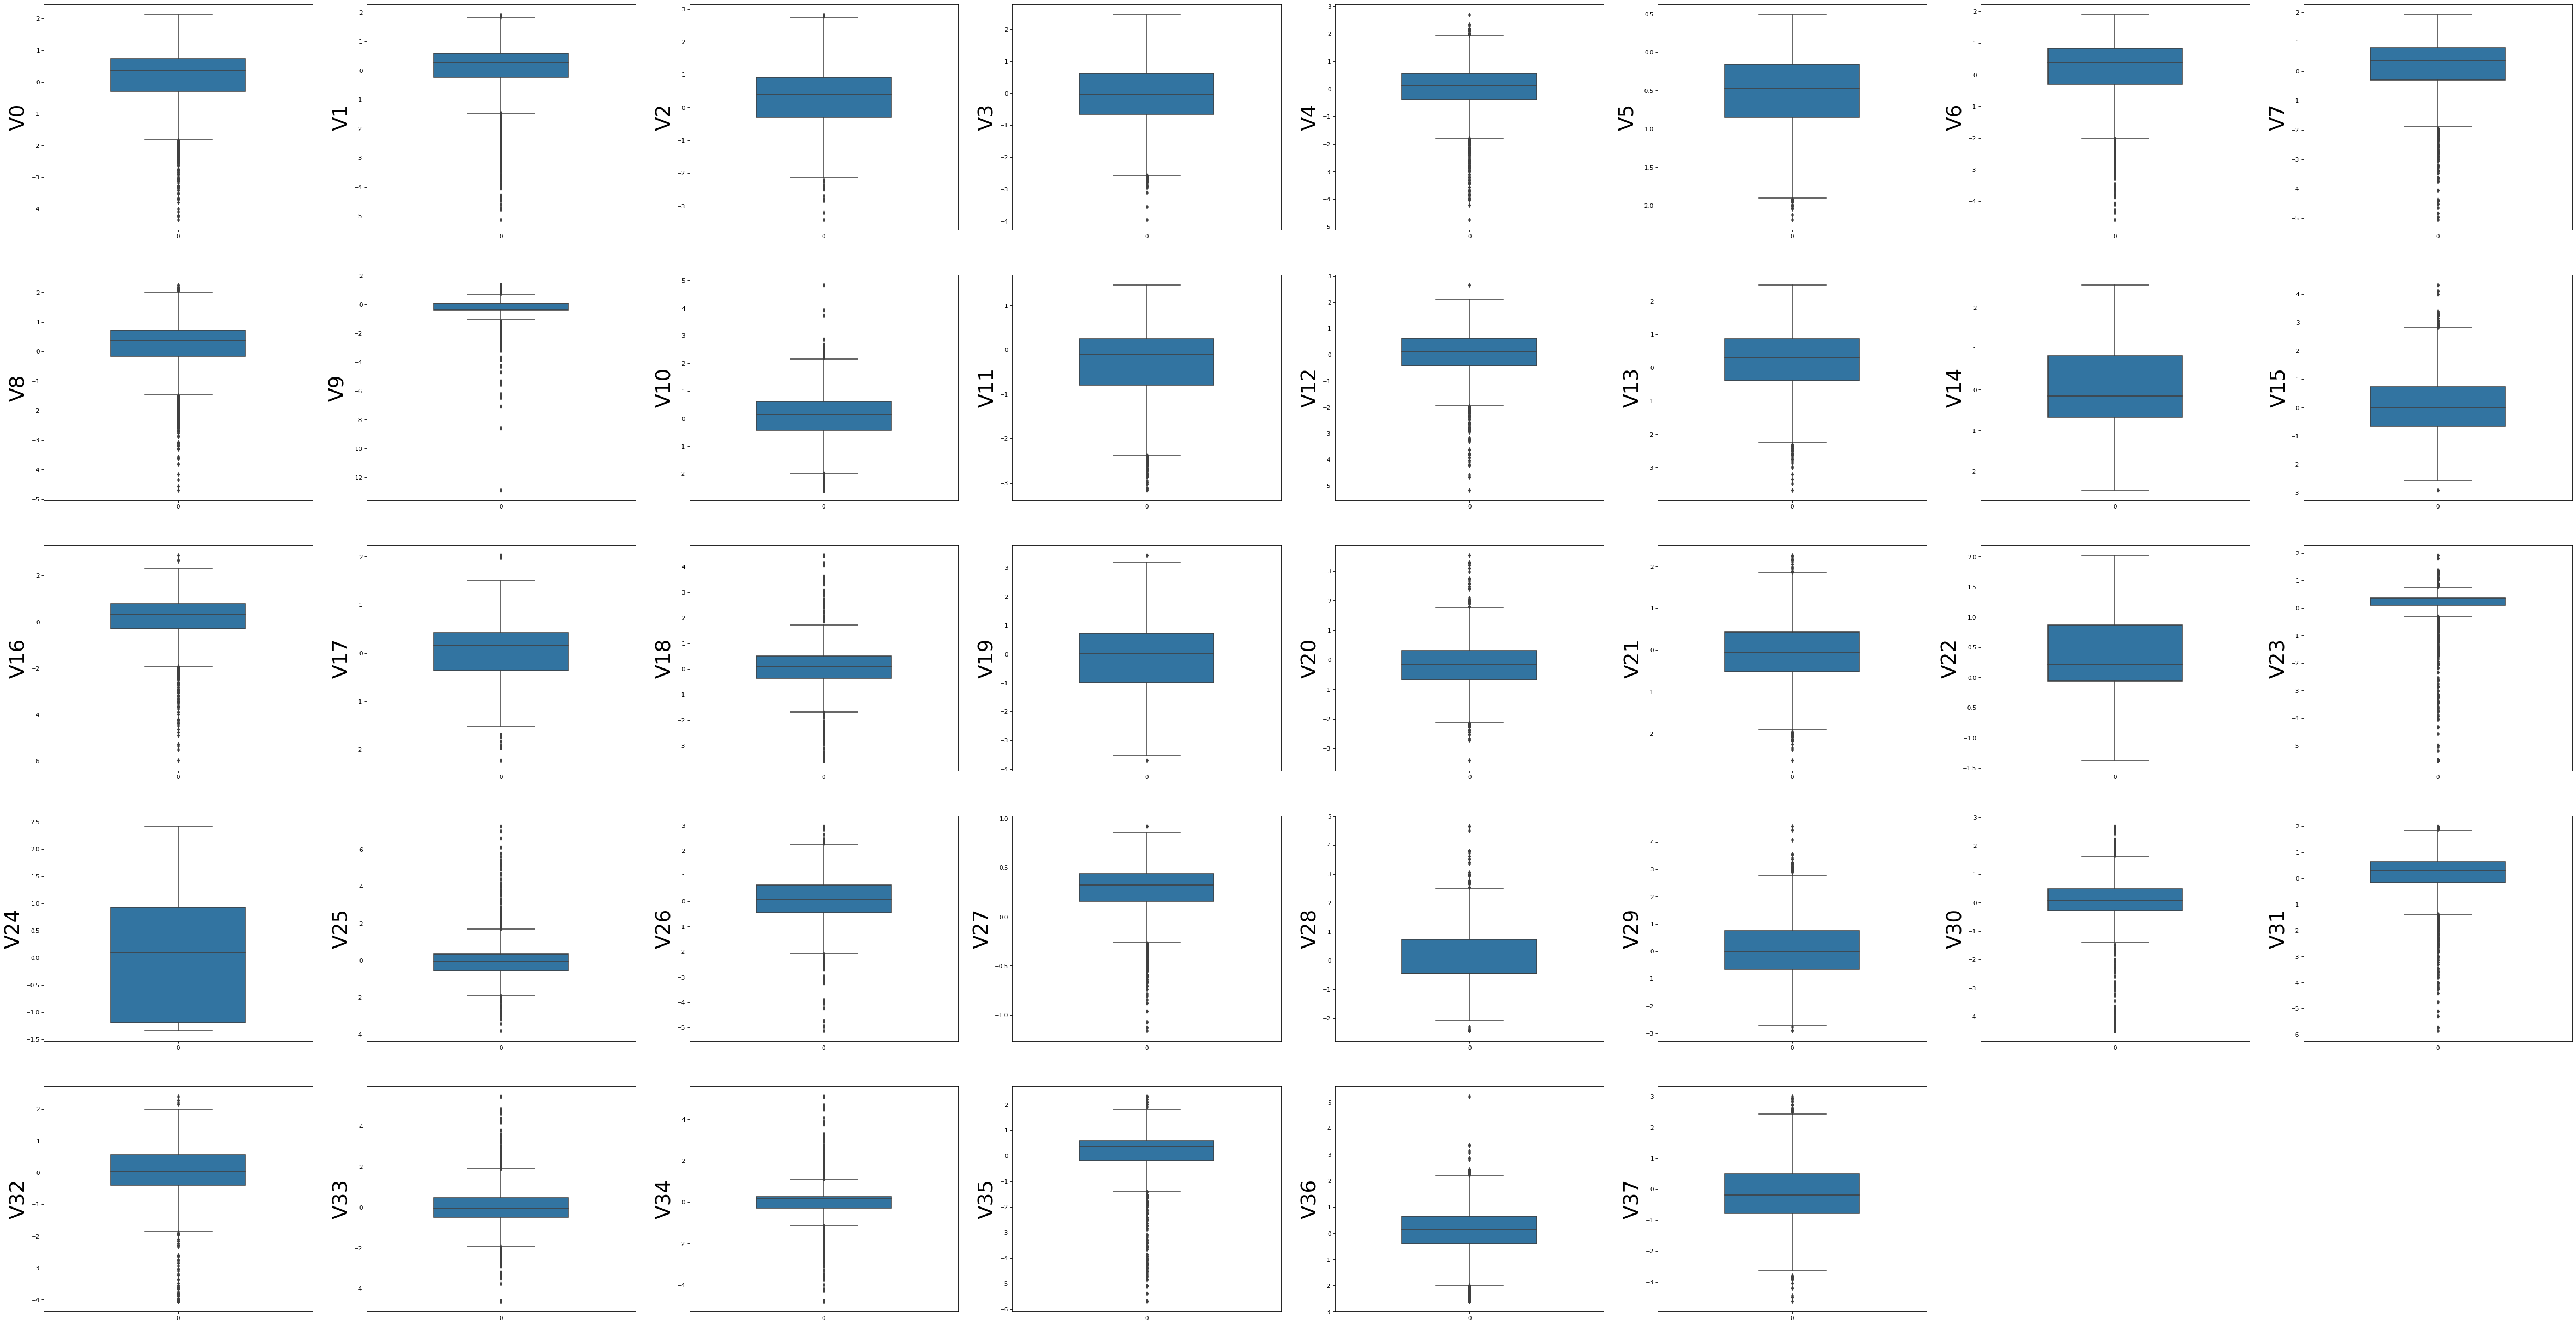

In [10]:
fig = plt.figure(figsize=(80, 60), dpi=75)
for i in range(38):
    plt.subplot(7, 8, i + 1)
    sns.boxplot(data=df_train[column[i]], orient='v', width=0.5)
    plt.ylabel(column[i], fontsize=36)

# 生成的图片可以右键“在新窗口中查看”
plt.show()

书中还给出一种绘制方式。如下

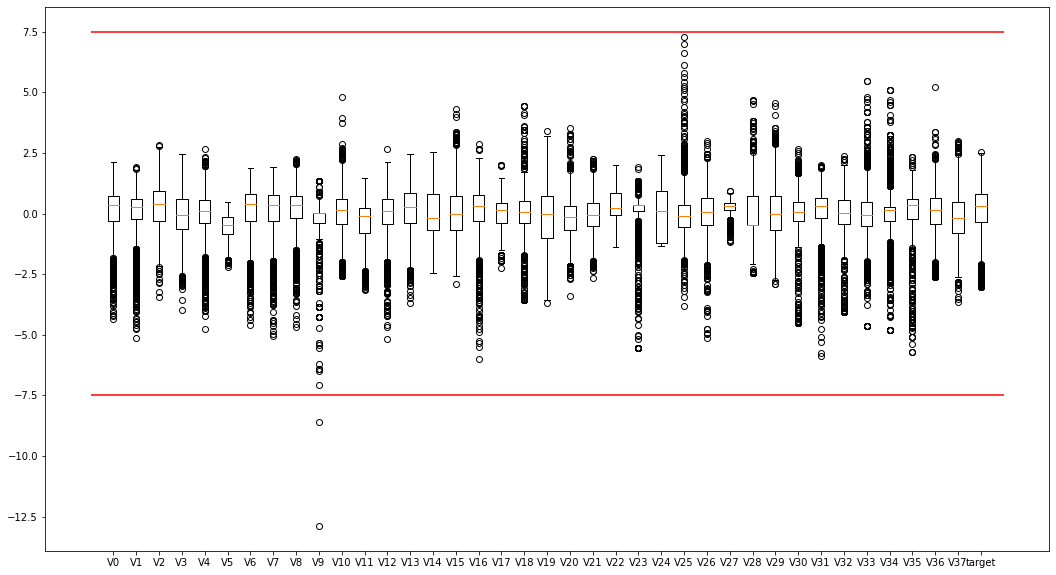

In [11]:
plt.figure(figsize=(18, 10))
plt.boxplot(x=df_train.values, labels=df_train.columns)
# 这里为什么是在[-7.5, 7.5]划分出一个区间？
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()

### 数据分布情况 - 岭回归获取异常值

通过岭回归自动找到异常值。

R2= 0.8890858938210386
mse= 0.10734857773123635
-----------------------------------
mean of residuals: 4.1748691299962606e-17
std of residuals: 0.32769766731934985
-----------------------------------
31 outliers:
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]


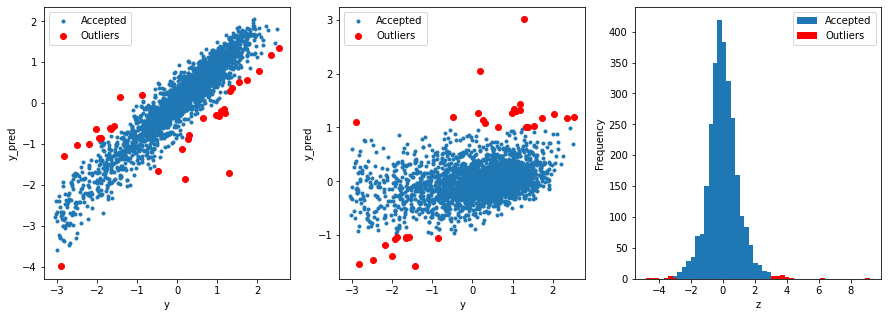

In [13]:
# function to detect outliers based on the predictions of a model 
def find_outliers(model, X, y, sigma=3): # X:feature y:label
    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting failed, try fitting the model first
    except:
        model.fit(X, y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    # calculate a statistic, define outliers to be where z >sigma 这里是标准化的计算公式
    z = (resid - mean_resid) / std_resid
    outliers = z[abs(z) > sigma].index
    
    # print and plot the results 
    print('R2=', model.score(X,y))
    print('mse=', mean_squared_error(y,y_pred))
    print('-----------------------------------')
    
    print('mean of residuals:', mean_resid)
    print('std of residuals:' , std_resid)
    print('-----------------------------------')
    
    print(len(outliers),'outliers:')
    print(outliers.tolist())
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y ,y_pred, '.')
    plt.plot(y.loc[outliers], y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('y')
    plt.ylabel('y_pred')    
    
    ax_132 = plt.subplot(1,3,2)
    plt.plot(y ,y - y_pred, '.')
    plt.plot(y.loc[outliers], y.loc[outliers] - y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('y')
    plt.ylabel('y_pred')
    
    ax_133 = plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax= ax_133)
    z.loc[outliers].plot.hist(color='r', bins=50, ax=ax_133)
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
X_train = df_train.iloc[:,0:-1]
y_train = df_train.iloc[:,-1]
outliers = find_outliers(Ridge(), X_train, y_train)

TODO 其他列的图

### 数据分布情况 - 直方图和Q-Q图

Q-Q图是值数据的分位数和正态分布的分位数对比参照的图。如果数据符合正态分布，则所有点都会落在直线上。绘制Q-Q图查看统计分布是否近似于正态分布。

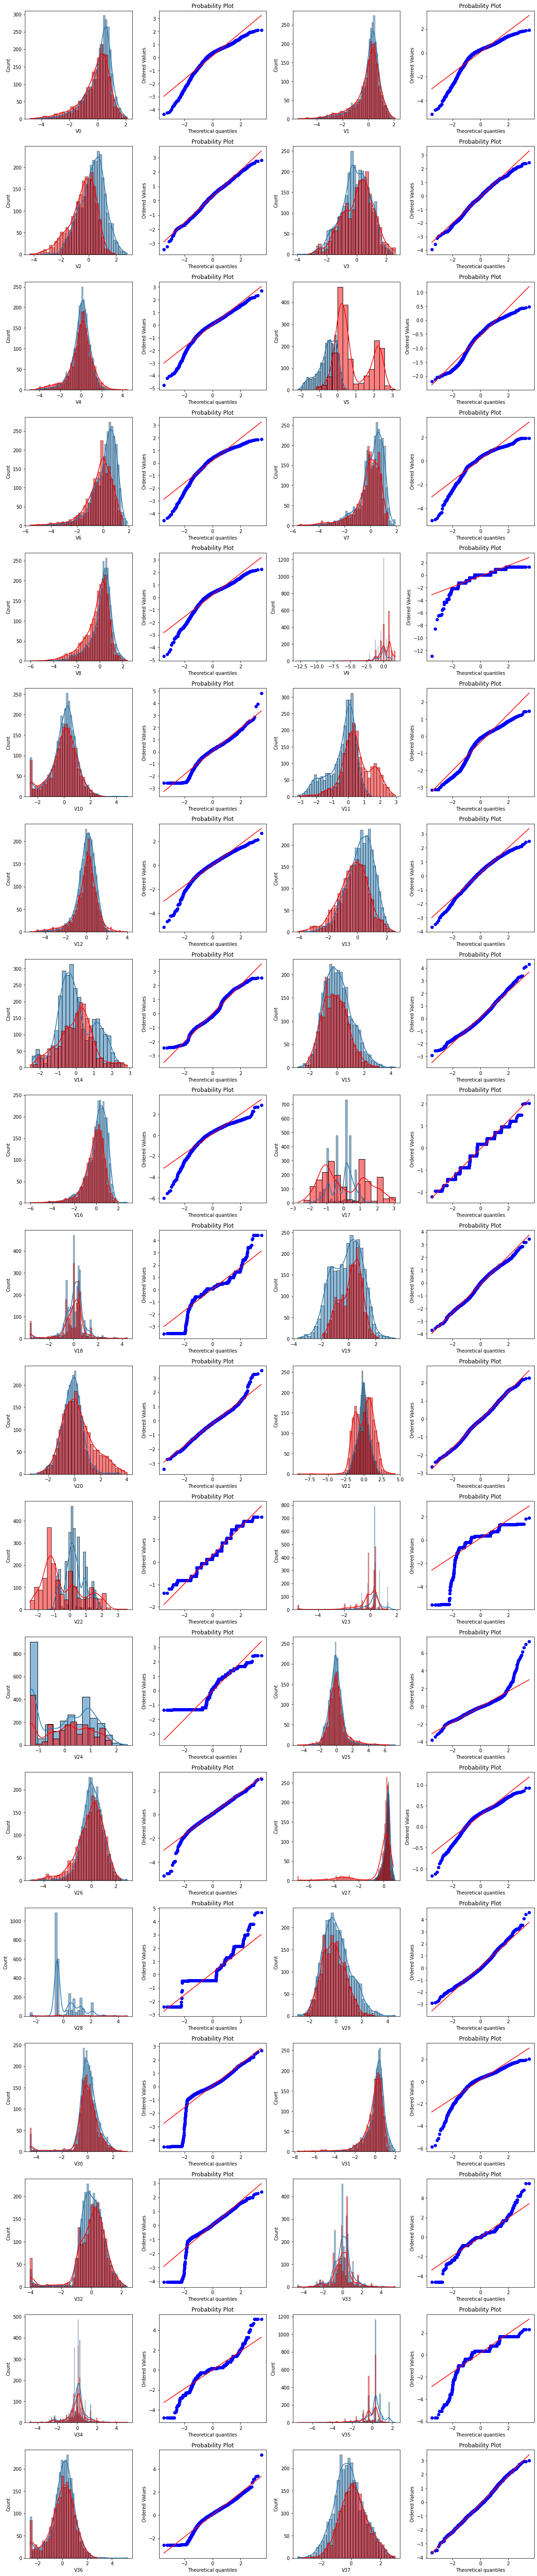

In [15]:
from scipy import stats

#提取df_train中的特征标签，并将起转换成列表形式
feature_list=list(df_train.columns)
#为方便之后使用，去掉列表中被一并提取出来的target标签，确保仅留特征标签
feature_list.remove('target')

plt_rows = len(feature_list)
plt_cols = 4

plt.figure(figsize=(4 * plt_cols, 4 * plt_rows))

i = 0
for col in feature_list:
    i += 1
    ax = plt.subplot(plt_rows, plt_cols, i)
    sns.histplot(df_train[col], kde=True)
    sns.histplot(df_test[col], kde=True, color='r')
    
    i += 1
    ax = plt.subplot(plt_rows, plt_cols, i)
    res = stats.probplot(df_train[col], plot=plt)
    
plt.tight_layout()
plt.show()

理想状态下，针对同一特征，训练集的数据分布曲线应该和测试集的数据分布曲线完全一致，但是这在实际过程中并不多见。

如`V0`和`V1`两个特征的分布图可以发现，虽然训练集和测试集的数据分布情况略有差异，但仍然可以认为是分布情况一致的。

而`V5`和`V17`特征图清晰的反映了数据分布不一致的情况。

同时在训练集和测试集中将数据分布不一致的特征去除

In [16]:
df_train=df_train[['V0','V1','V3','V4','V8','V10','V12','V15','V16','V18','V24','V25','V26','V28','V29','V30','V31','V32','V33','V34','V36','target']]
df_test=df_test[['V0','V1','V3','V4','V8','V10','V12','V15','V16','V18','V24','V25','V26','V28','V29','V30','V31','V32','V33','V34','V36']]

因为训练集和测试集的特征经过了筛选都发生了变化，为了方便之后的操作，重新提取出训练集中所有的特征标签，更新特征标签列表feature_list

In [17]:
#提取df_train中的特征标签，并将起转换成列表形式
feature_list=list(df_train.columns)
#为方便之后使用，去掉列表中被一并提取出来的target标签，确保仅留特征标签
feature_list.remove('target')

', '.join(feature_list)

'V0, V1, V3, V4, V8, V10, V12, V15, V16, V18, V24, V25, V26, V28, V29, V30, V31, V32, V33, V34, V36'

### 数据分布情况 - KDE分布图

KDE（Kernel Density Estimation, 核密度估计）可以理解为是对直方图的加窗平滑。通过绘制KDE图，可以查看并对比`训练集`和`测试集`中特征变量的分布情况，发现两个数据集中分布不一致的特征变量。

**有点像上面那一组Q-Q图**

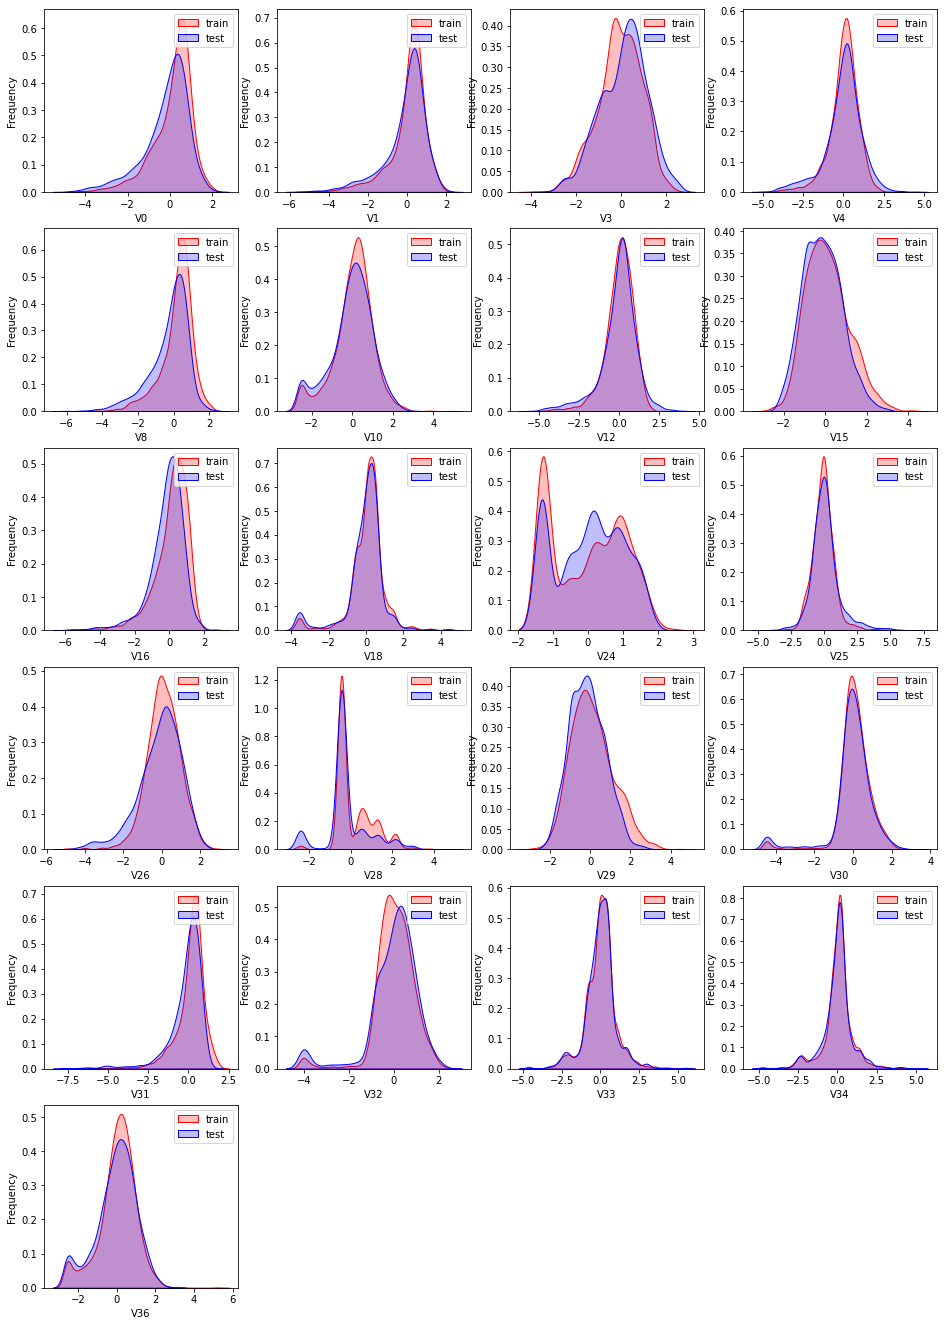

In [18]:
dist_cols = 4
dist_rows = len(feature_list)
plt.figure(figsize=(4 * dist_cols, 4 * dist_rows))

i=1
for col in feature_list:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(df_train[col], color='red', shade=True)
    ax = sns.kdeplot(df_test[col], color='Blue',shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax =ax.legend(["train","test"])
    i+=1
    
plt.show()

### 数据分布情况 - 线性回归关系图

线性回归关系图主要用于分析变量间的线性回归关系。

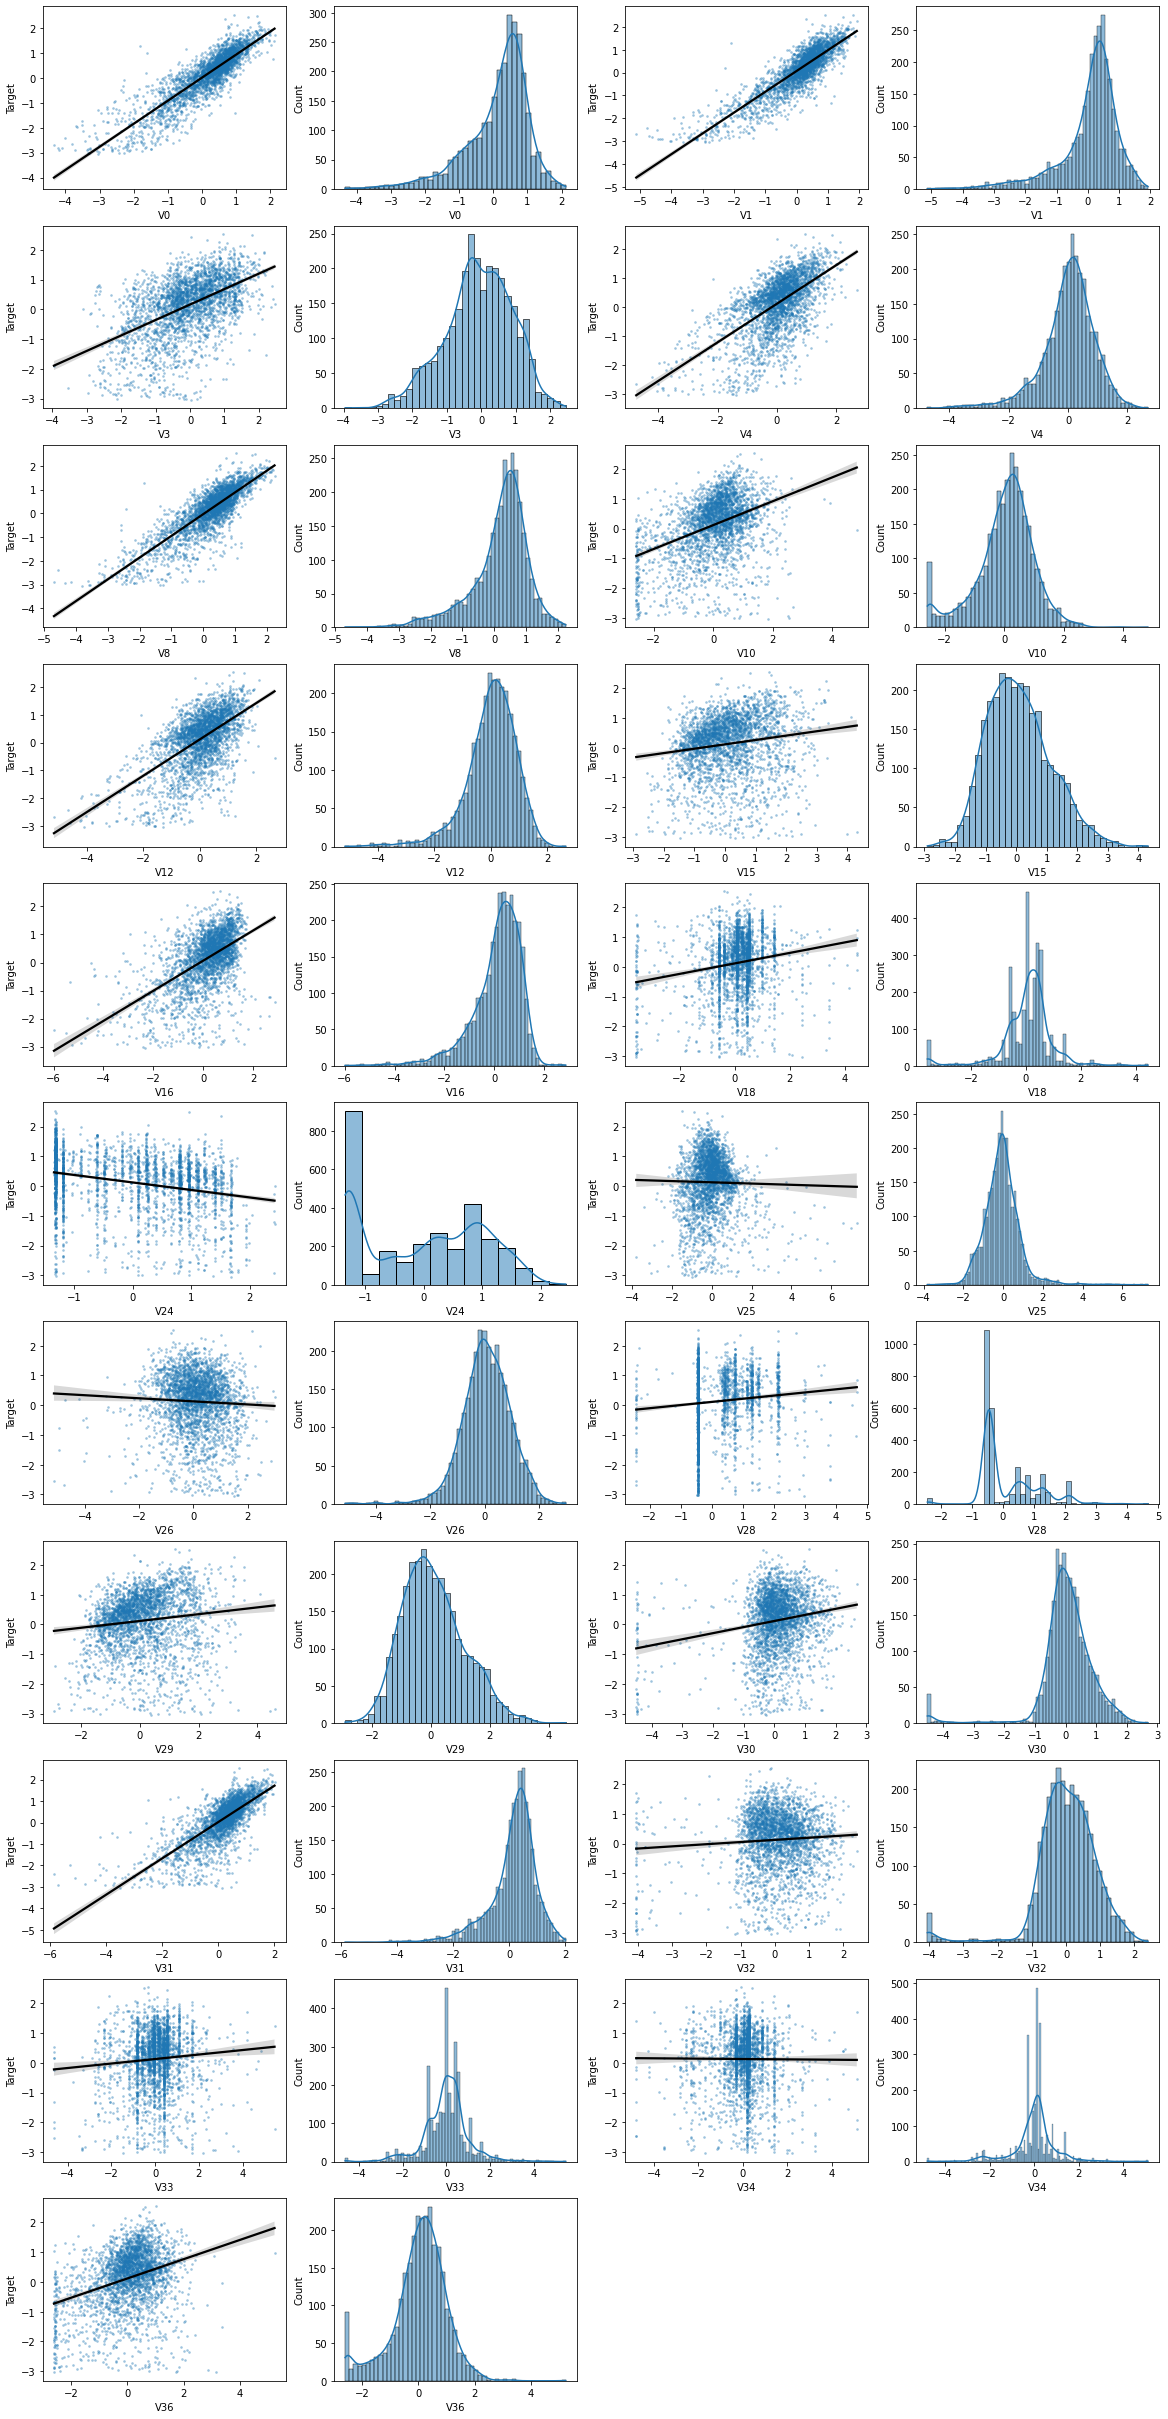

In [19]:
fcols = 4
frows = len(feature_list)
plt.figure(figsize=(5 * fcols, 4 * frows))

i=0
for col in feature_list:
    i+=1
    ax = plt.subplot(frows, fcols, i)
    sns.regplot(x=col, y= 'target', data=df_train,
                ax=ax, scatter_kws={'marker':'.','s':3,'alpha':0.3}, line_kws={'color':'k'})
    ax.set_xlabel(col)
    ax.set_ylabel("Target")
    
    i+=1
    ax = plt.subplot(frows, fcols, i)
    sns.histplot(df_train[col].dropna(), kde=True)
    plt.xlabel(col)
    
plt.show()

## 计算相关性系数

在删除训练集和测试集中分布不一致的特征变量后，如V5,V9,V11,V17,V22,V28之后，计算剩余特征变量和target变量的相关性系数。

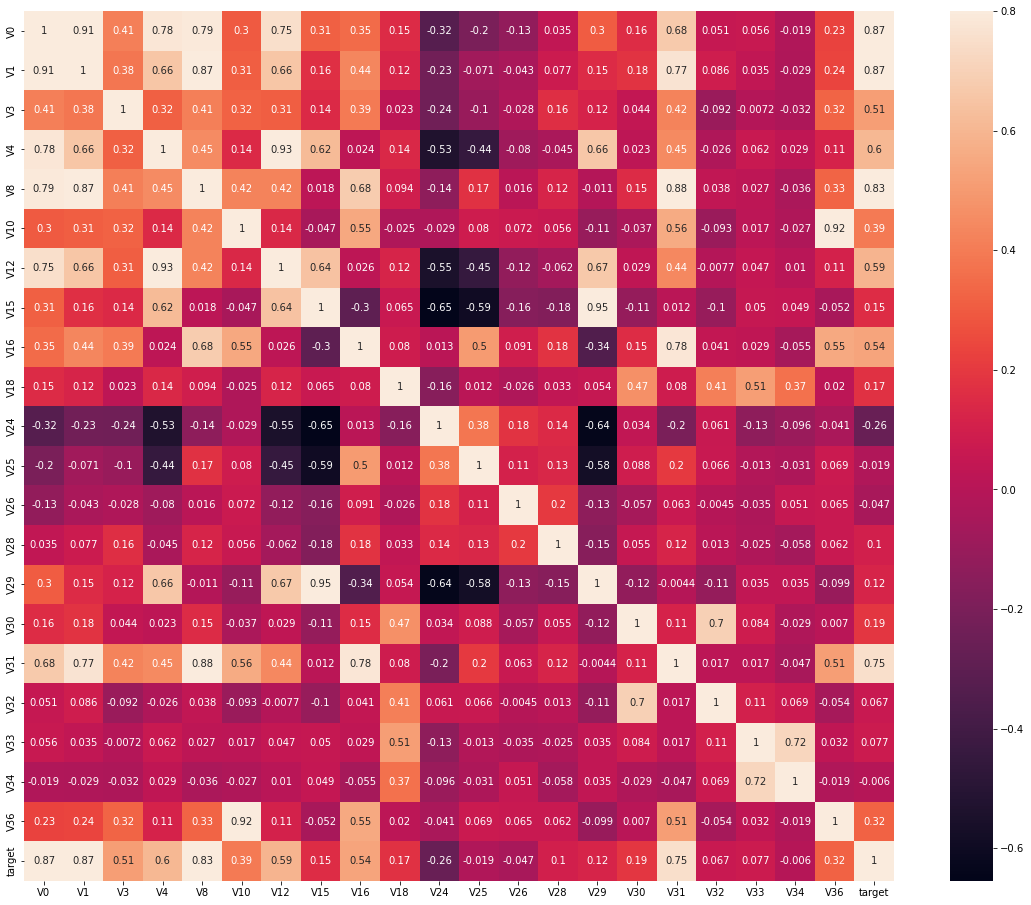

In [20]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

train_corr = df_train.corr()
train_corr
ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)

这里只关注每一个特征与`target`之间的相关性。相关系数的绝对值大于0.5的为强相关性，小于0.5的为弱相关性，0附近的为没有相关性，系数为正代表正相关，系数为负代表负相关。

以可视化方法绘制特征标签与预测标签（target）的散点图，与相关系数的计算结果进行相互校对：

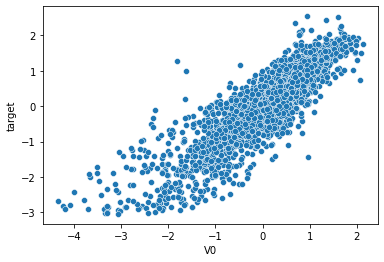

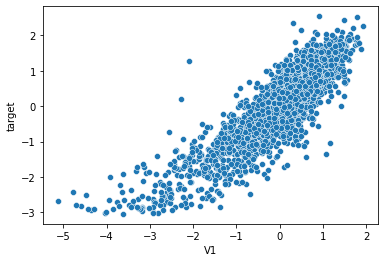

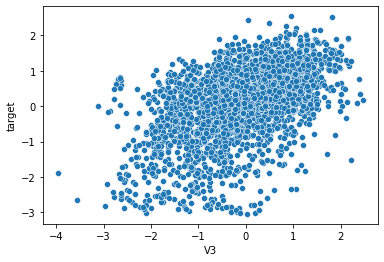

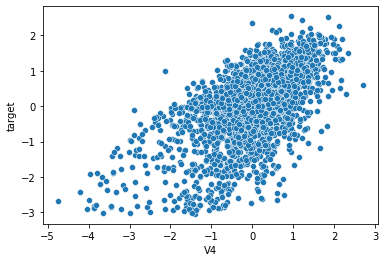

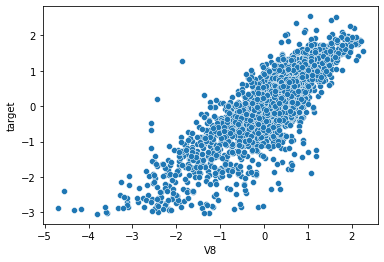

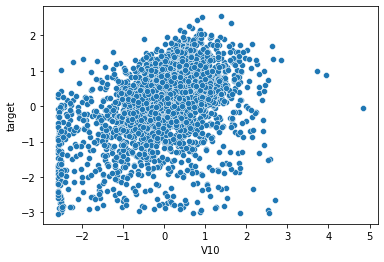

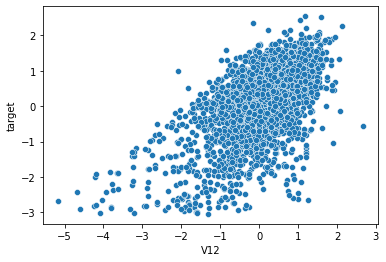

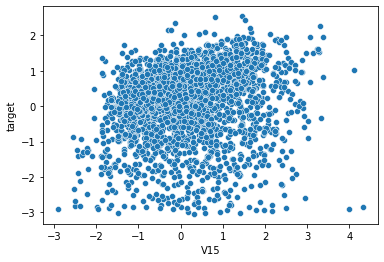

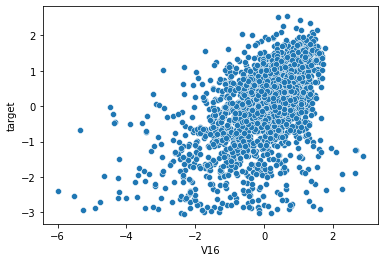

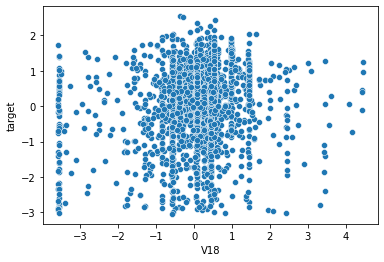

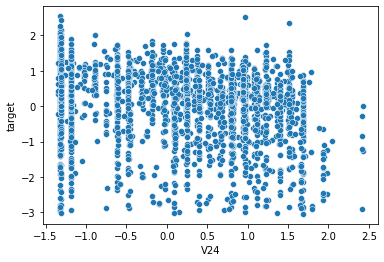

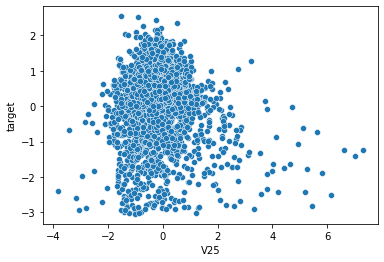

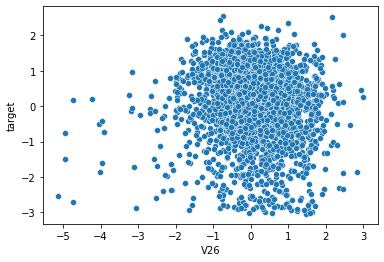

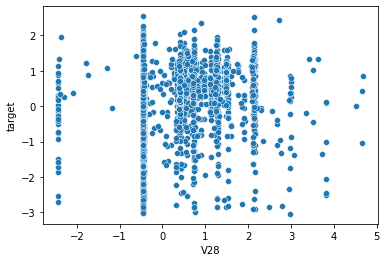

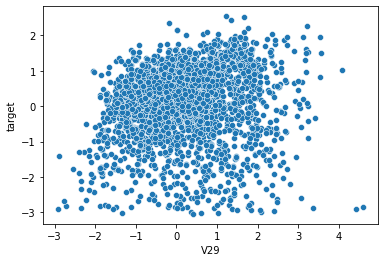

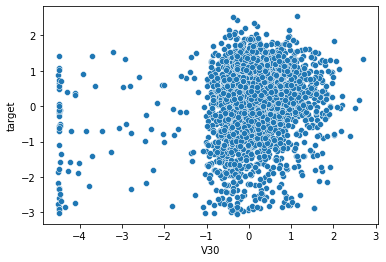

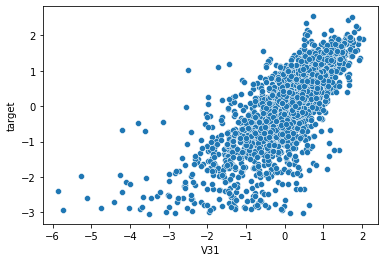

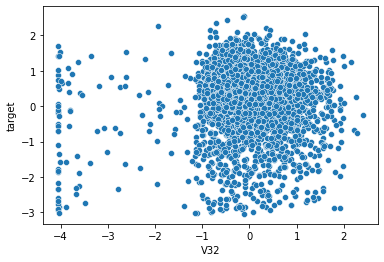

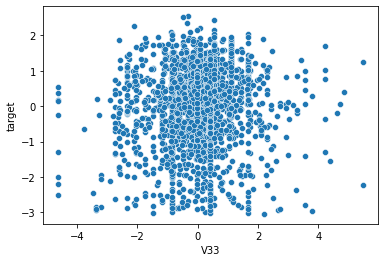

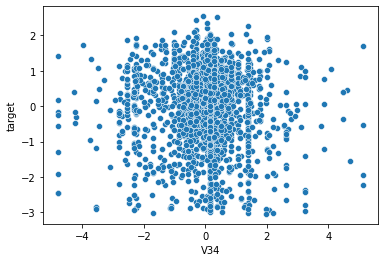

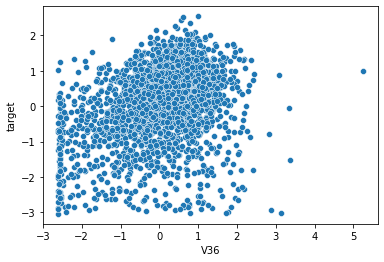

In [21]:
# TODO 改变一下图标的外观，变成两列
for i in feature_list:
    sns.scatterplot(x=df_train[f'{i}'], y=df_train['target'])
    plt.show()

根据相关系数筛选特征变量。找出与target变量的相关系数大于0.5的特征变量。

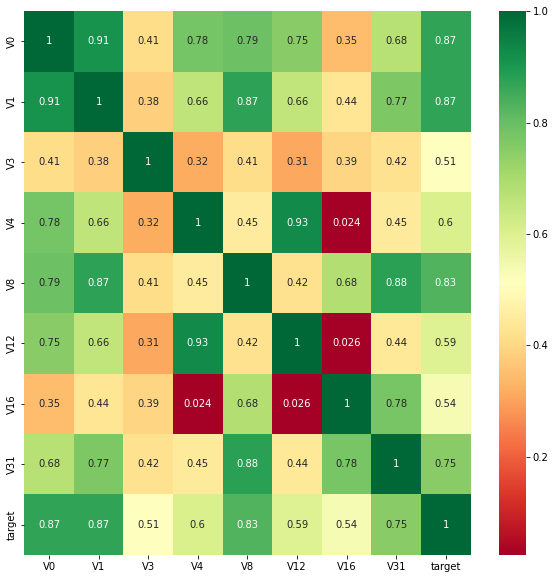

In [22]:
threshold = 0.5

corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(), annot=True, cmap="RdYlGn")

以0.5为界限，同时在训练集和测试集中去除相关系数绝对值低于0.5的特征，确保被输入模型进行训练的特征与预测目标值有较强的相关性。

In [23]:
df_train=df_train[['V0','V1','V3','V4','V8','V12','V16','V31','target']]
df_test=df_test[['V0','V1','V3','V4','V8','V12','V16','V31']]

#提取df_train中的特征标签，并将起转换成列表形式
feature_list=list(df_train.columns)
#为方便之后使用，去掉列表中被一并提取出来的target标签，确保仅留特征标签
feature_list.remove('target')

', '.join(feature_list)

'V0, V1, V3, V4, V8, V12, V16, V31'

## 正态分布检验

对于完成进一步筛选的数据集做正态分布检验，以确定是否需要进一步将数据尽可能转换成正态分布的形式，本文同样同时采用指标计算的方法和可视化的方法来同时进行正态分布检验。

首先检验各个特征中数据的偏度，偏度定义中包括
- 正态分布（偏度=0）
- 右偏分布（也叫正偏分布，其偏度>0）
- 左偏分布（也叫负偏分布，其偏度<0）

In [24]:
from scipy import stats

for i in feature_list:
    skew = stats.skew(df_train[f'{i}'])
    print(f'the skew value of feture {i} is {skew}')

the skew value of feture V0 is -1.274557400506133
the skew value of feture V1 is -1.6362082255126171
the skew value of feture V3 is -0.3525158668876084
the skew value of feture V4 is -1.0225882649648517
the skew value of feture V8 is -1.2510117368817457
the skew value of feture V12 is -1.1495057890140747
the skew value of feture V16 is -1.524795002807165
the skew value of feture V31 is -1.6784701924519203


根据偏度的检验结果，各个特征的数据都为左偏，但是总体都满足正态分布。之后检验各个特征中数据的峰度：
- 若峰度≈0，分布的峰态服从正态分布
- 若峰度>0，分布的峰态陡峭（高尖）
- 若峰度<0，分布的峰态平缓（矮胖）

In [25]:
for i in feature_list:
    kurtosis = stats.kurtosis(df_train[f'{i}'])
    print(f'the kurtosis value of feture {i} is {kurtosis}')

the kurtosis value of feture V0 is 2.2081464879424457
the kurtosis value of feture V1 is 3.7069397335011525
the kurtosis value of feture V3 is -0.07853226221268583
the kurtosis value of feture V4 is 2.5857888253446397
the kurtosis value of feture V8 is 2.477237645942078
the kurtosis value of feture V12 is 2.9927019454896415
the kurtosis value of feture V16 is 3.909445710111876
the kurtosis value of feture V31 is 5.341126690479877


## Box-Cox变换

Box-Cox变换是统计建模中常用的一种数据转换方法，用于连续的响应变量不满足正态分布的情况。Box-Cox变换之后，可以一定程度上减小不可观测的误差和预测变量的相关性。Box-Cox变换的主要特点是引入一个参数，通过数据本身估计该参数进而确定应采取的数据变换形式，Box-Cox变换可以明显地改善数据的正态性、对称性和方差相等性，对许多实际数据都是行之有效的

在做Box-Cox之前，需要对数据做归一化处理。在归一化时，对数据进行合并操作可以使训练数据和测试数据一致。

In [26]:
# TODO 这里是否需要对 df_train 先 copy 一下
train_x = df_train.drop(['target'],axis=1)
# 合并训练集和测试集的数据
data_all = pd.concat([train_x,df_test])
data_all.head()

V0     V1     V3     V4     V8    V12    V16    V31
0  0.566  0.016  0.407  0.452 -0.436 -0.073 -1.707 -0.615
1  0.968  0.437  0.566  0.194  0.332 -0.134 -0.977  0.032
2  1.013  0.568  0.370  0.112  0.396 -0.072 -0.618  0.277
3  0.733  0.368  0.165  0.599  0.403 -0.014 -0.429  0.279
4  0.684  0.638  0.209  0.337  0.314  0.199 -0.391  0.328

In [27]:
data_all.shape

(4813, 8)

先观察一下归一化前的数据状态

In [28]:
data_all.describe()

V0           V1           V3           V4           V8  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.000080     0.000082    -0.000013     0.000085     0.000049   
std       1.000013     1.000016     0.999995     1.000015     0.999994   
min      -4.814000    -5.488000    -3.956000    -4.921000    -6.059000   
25%      -0.468000    -0.319000    -0.651000    -0.428000    -0.429000   
50%       0.245000     0.237000     0.073000     0.114000     0.231000   
75%       0.666000     0.595000     0.704000     0.576000     0.637000   
max       2.121000     2.120000     2.603000     4.475000     2.408000   

               V12          V16          V31  
count  4813.000000  4813.000000  4813.000000  
mean      0.000071    -0.000021    -0.000004  
std       1.000014     1.000000     0.999999  
min      -5.505000    -6.060000    -7.698000  
25%      -0.434000    -0.445000    -0.300000  
50%       0.125000     0.187000     0.217000  
75%       0.604000     0.660000     0.578000  
max       4.011000     2.861000     2.013000

对合并后的每一列数据做归一化。

In [30]:
def scale_minmax(col):
    return (col - col.min()) / (col.max() - col.min())

data_all[feature_list] = data_all[feature_list].apply(scale_minmax, axis=0)
data_all[feature_list].describe()

V0           V1           V3           V4           V8  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.694172     0.721357     0.603139     0.523743     0.715607   
std       0.144198     0.131443     0.152462     0.106430     0.118105   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626676     0.679416     0.503888     0.478182     0.664934   
50%       0.729488     0.752497     0.614270     0.535866     0.742884   
75%       0.790195     0.799553     0.710474     0.585036     0.790835   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V12          V16          V31  
count  4813.000000  4813.000000  4813.000000  
mean      0.578507     0.679294     0.792709  
std       0.105088     0.112095     0.102976  
min       0.000000     0.000000     0.000000  
25%       0.532892     0.629414     0.761816  
50%       0.591635     0.700258     0.815055  
75%       0.641971     0.753279     0.852229  
max       1.000000     1.000000     1.000000

对特征变量做Box-Cox变换后，计算分位数并画图展示（基于正态分布），显示特征变量与targe变量的线性关系。

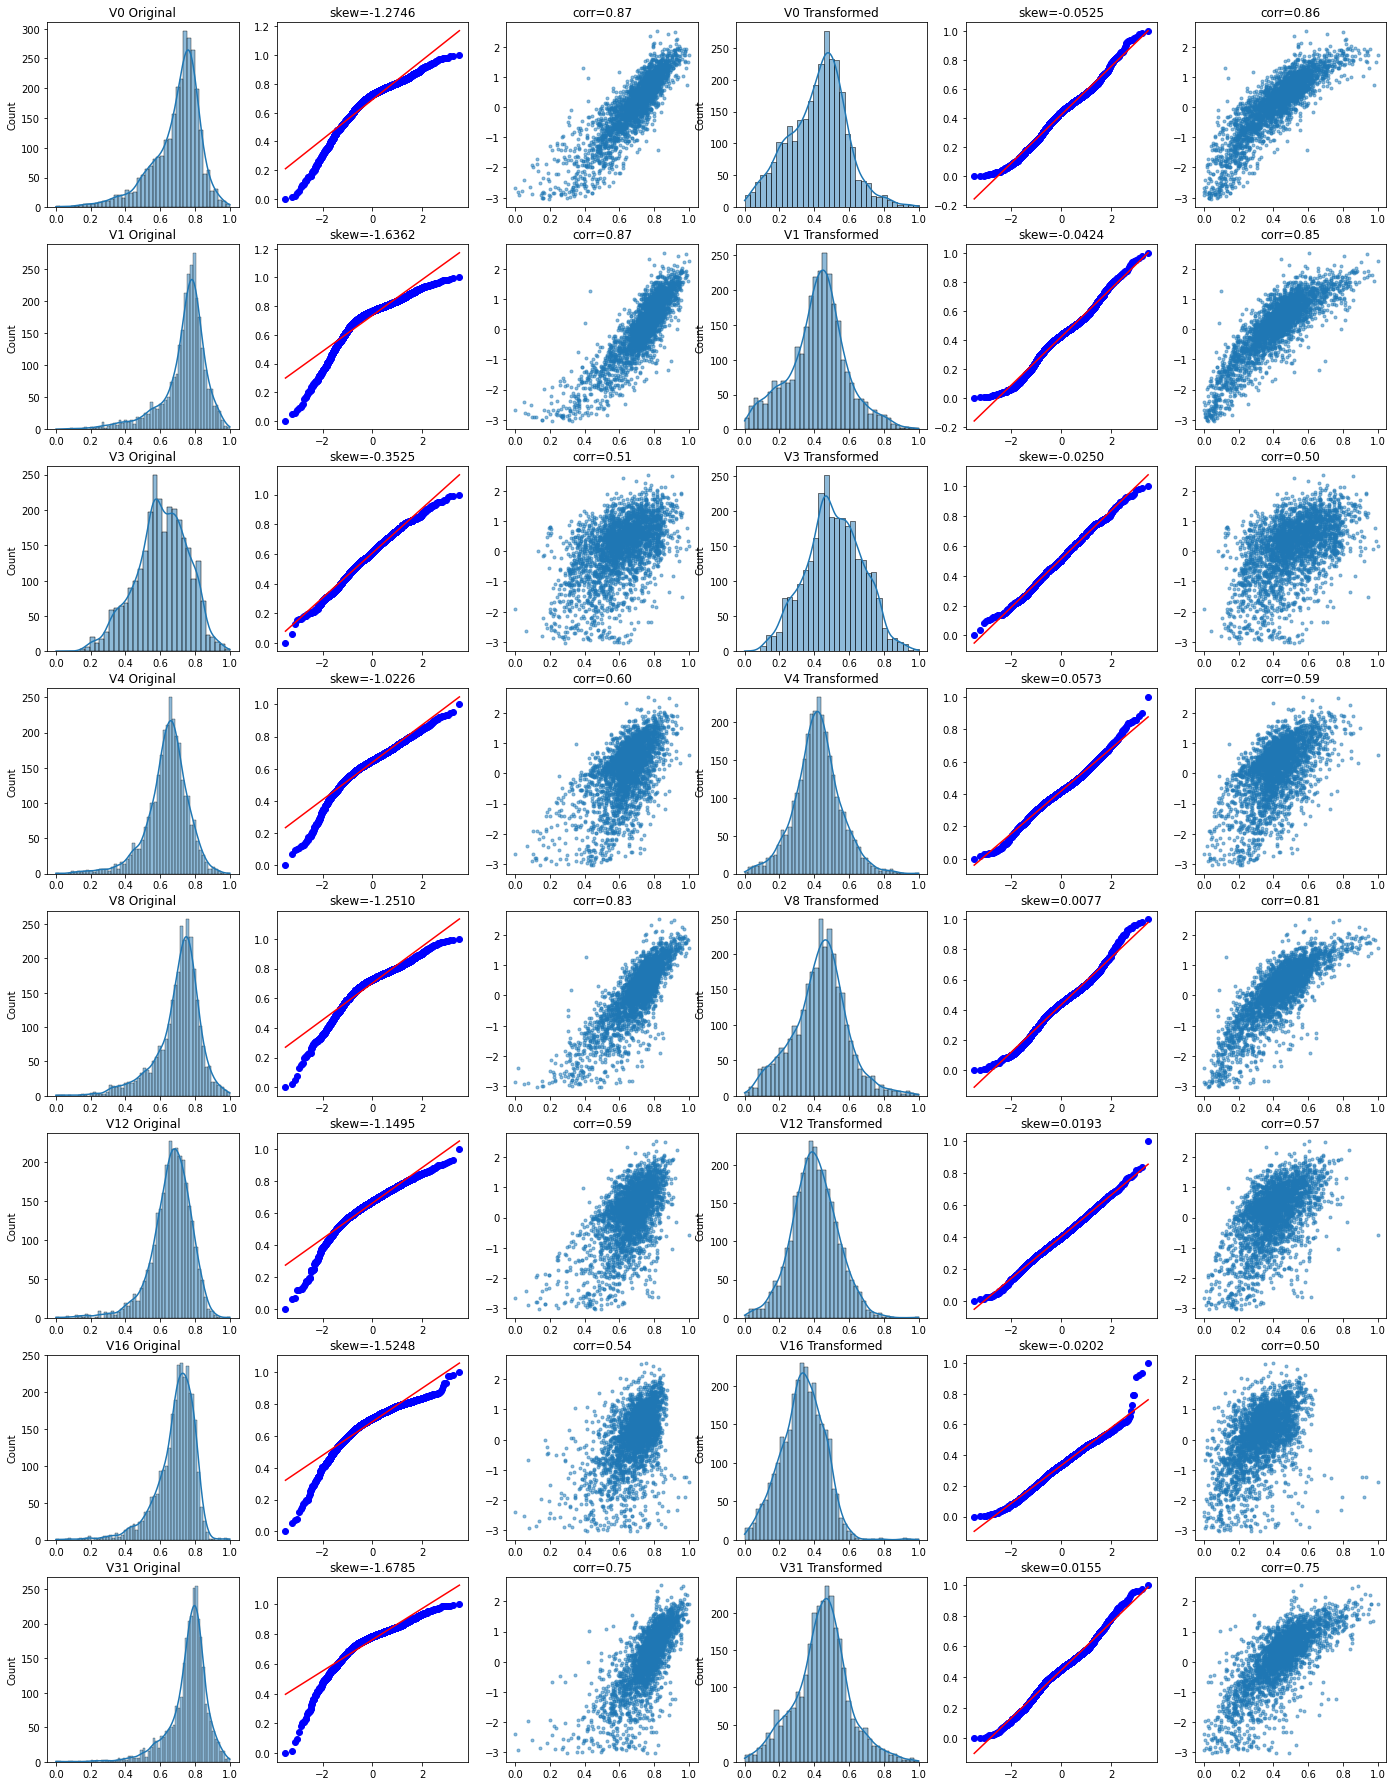

In [32]:
train_data_process = df_train[feature_list]
train_data_process = train_data_process[feature_list].apply(scale_minmax,axis=0)

total_features = len(feature_list)

feature_list_left = feature_list[0:total_features]
feature_list_right = feature_list[total_features:]
train_data_process = pd.concat([train_data_process, df_train['target']], axis=1)

fcols = 6
frows = len(feature_list_left)
plt.figure(figsize=(4 * fcols, 4 * frows))
i = 0

for var in feature_list_left:
    dat = train_data_process[[var, 'target']].dropna()
    
    i+=1
    plt.subplot(frows, fcols, i)
    sns.histplot(dat[var], kde=True)
    plt.title(var + ' Original')
    plt.xlabel('')
    
    i+=1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(dat[var], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
    
    i+=1
    plt.subplot(frows, fcols, i)
    plt.plot(dat[var], dat['target'], '.', alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
    
    i+=1
    plt.subplot(frows, fcols, i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna() + 1)
    trans_var = scale_minmax(trans_var)
    sns.histplot(trans_var, kde=True)
    plt.title(var + ' Transformed')
    plt.xlabel('')
    
    i+=1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(trans_var, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
    
    i+=1
    plt.subplot(frows, fcols, i)
    plt.plot(trans_var, dat['target'], '.', alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var, dat['target'])[0][1]))